In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense as dense
import matplotlib.pyplot as plt
from skimage import io
import cv2
from matplotlib.colors import NoNorm
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
import zipfile

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O ./train.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O ./test.zip

--2021-05-23 18:23:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4002:825::2010, 2404:6800:4002:822::2010, 2404:6800:4002:823::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4002:825::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./train.zip’

./train.zip         100%[===================>] 191.38M  3.16MB/s    in 61s     

2021-05-23 18:24:35 (3.15 MB/s) - ‘./train.zip’ saved [200682221/200682221]

--2021-05-23 18:24:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4002:824::2010, 2404:6800:4002:823::2010, 2404:6800:4002:822::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4002:824::2010|:443... connected.
HTTP request sent, awaiti

In [6]:
local_zip = 'train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

local_zip = 'test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [9]:
TRAINING_DIR = "./rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
print(type(train_generator))

<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>


In [17]:
model=keras.Sequential()
layer1=keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3))
model.add(layer1)
layer_maxpool = keras.layers.MaxPooling2D(2,2)
layer_conv2d = keras.layers.Conv2D(64,(3,3), activation='relu')
for i in range(3):
    model.add(layer_maxpool)
    model.add(layer_conv2d)
model.add(layer_maxpool)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(dense(512,activation='relu'))
model.add(dense(3,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [20]:
history = model.fit_generator(train_generator,epochs=25,validation_data=validation_generator,verbose=1)

Epoch 1/25
20/20 [==============================] - 35s 2s/step - loss: 0.6876 - accuracy: 0.7063 - val_loss: 0.3264 - val_accuracy: 0.8871
Epoch 2/25
20/20 [==============================] - 35s 2s/step - loss: 0.6853 - accuracy: 0.7202 - val_loss: 0.5110 - val_accuracy: 0.8790
Epoch 3/25
20/20 [==============================] - 35s 2s/step - loss: 0.5432 - accuracy: 0.7889 - val_loss: 0.3279 - val_accuracy: 0.9194
Epoch 4/25
20/20 [==============================] - 35s 2s/step - loss: 0.4768 - accuracy: 0.8071 - val_loss: 0.2165 - val_accuracy: 0.9677
Epoch 5/25
20/20 [==============================] - 35s 2s/step - loss: 0.4219 - accuracy: 0.8282 - val_loss: 0.1187 - val_accuracy: 0.9704
Epoch 6/25
20/20 [==============================] - 35s 2s/step - loss: 0.3256 - accuracy: 0.8706 - val_loss: 0.1250 - val_accuracy: 0.9597
Epoch 7/25
20/20 [==============================] - 35s 2s/step - loss: 0.3610 - accuracy: 0.8583 - val_loss: 0.0813 - val_accuracy: 0.9866
Epoch 8/25
20/20 [==

In [57]:
# print(history.history.keys())
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs=len(train_loss)
print("accuracy:",val_acc[epochs-1]*100,"%")


accuracy: 98.11828136444092 %


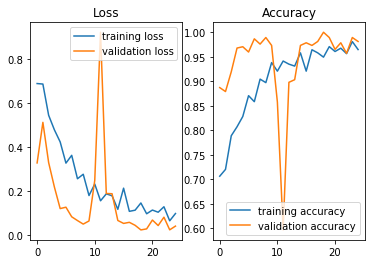

In [52]:
plt.subplot(1,2,1)
plt.plot(range(epochs),train_loss,label='training loss')
plt.plot(range(epochs),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(range(epochs),train_acc,label='training accuracy')
plt.plot(range(epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.show()

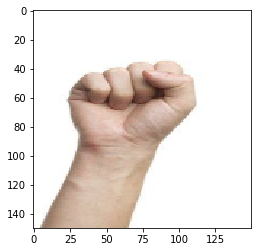

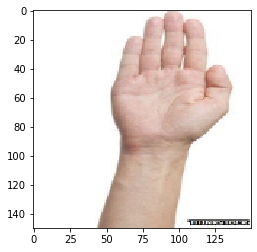

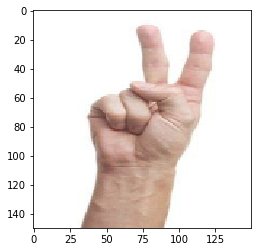

In [44]:
# testing the prediction

image = io.imread('rps.jpg')
# plt.imshow(image)
# print(image.shape)
# image=image.reshape(1,351,624,3)
rock=cv2.resize(image[:,0:200],(150,150))
scissor=cv2.resize(image[:,200:400],(150,150,))
paper=cv2.resize(image[:,400:],(150,150))
plt.imshow(rock)
plt.show()
plt.imshow(paper)
plt.show()
plt.imshow(scissor)
plt.show()
rock=rock.reshape(1,150,150,3)
paper=paper.reshape(1,150,150,3)
scissor=scissor.reshape(1,150,150,3)

In [49]:
a=model.predict(scissor)
label=np.argmax(a)
print(label)

# label    description
# 0         paper
# 1         rock
# 2         scissor

2


In [ ]:
# pretty good predictions